**Guidelines :-**    

1.>Use seperate Code Block for each part.   

2.>Put a comment at the top explaining what that code block does    

3.>Use relevant names for variables 

[**INDIAN WATER QUALITY**](https://www.kaggle.com/anbarivan/indian-water-quality-data)

**ABOUT THIS DATASET**

Combined data of historical water quality of certain locations in India.  Pollutants measures in each column is the average values measured over a period of time. Source: " Indian government websites''.

**WHY WE CHOSE THIS DATASET ?**

The data set provides valuable information about  important water qualifiers like TOTAL COLIFORM LEVEL  , TEMPERATURE , pH , B.O.D , D.O etc.  helpful  in determining the water quality of various water bodies across India.  By these water qualifier data values we can determine which state has the  most polluted water , unfit for domestic as well as for industrial purposes , and also toxic to the humans and the environment . We can also determine which state has the least polluted water and then can do an extensive study on that state and try to implement methods to keep the pollution levels less .  We can  determine the relationship between the water qualifiers and find which qualifier has the most impact on the pollution level. By realizing the extent of  pollution levels we all should make an effort in keeping our water bodies clean , and save ourselves and future generations from toxic water pollutants.

**WATER is what keeps humans alive. Maintaining its quality is of immense importance to our well-being. In this project, we have performed analysis on differnt water bodies in some of well known cities in India.OUR GOAL IS TO FIND THE MOST WATER POLLUTED CITY IN INDIA WITH THE PROVIDED WATER QUALIFIERS BY PERFORMING SOME STATISTICAL TESTS.** 

**IMPORTING ALL REQUIRED LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
missing_values=["NAN"]


**READING THE DATASET**

In [10]:
df= pd.read_csv('./water_dataX.csv',na_values=missing_values,encoding='latin1')

In [11]:
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11,27,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2,0.2,4953,8391,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NaN,29,7.5,585.0,6.3,2.6,0.155,0.155,315,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NaN,28,7.6,98.0,6.2,1.2,NaN,NaN,570,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NaN,28,7.7,91.0,6.5,1.3,NaN,NaN,562,2003


**DESCRIBING THE NUMERICAL VARAIBLES OF THE DATASET WITH IT'S STATISTICAL PARAMETERS**

In [9]:
df['year'] = pd.to_datetime(df['year'], format = "%Y")
df['STATION CODE'] = df['STATION CODE'].astype(str)
df.describe()

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm)
count,1960.000000,1983.000000,1966.000000
mean,6.392637,112.090674,1786.466394
std,1.332938,1878.930716,5552.276223
min,0.000000,0.000000,0.400000
25%,5.900000,6.900000,78.000000
50%,6.700000,7.300000,183.000000
75%,7.200000,7.700000,592.750000
max,11.400000,67115.000000,65700.000000


**Since some of the variables is not yet cleaned and has a lot of inconsistent and missing values some of the statisitical parameters like mean , std ,quartiles are missing.**

In [ ]:
df["B.O.D. (mg/l)"].describe()

count     1951
unique     407
top        1.5
freq        77
Name: B.O.D. (mg/l), dtype: object

In [ ]:
df['Temp'].describe()

count     1903
unique     178
top         28
freq       241
Name: Temp, dtype: object

In [ ]:
df['B.O.D. (mg/l)'].describe()

count     1951
unique     407
top        1.5
freq        77
Name: B.O.D. (mg/l), dtype: object

In [ ]:
df['NITRATENAN N+ NITRITENANN (mg/l)'].describe()

count     1771
unique     506
top        0.1
freq        77
Name: NITRATENAN N+ NITRITENANN (mg/l), dtype: object

In [ ]:
df['FECAL COLIFORM (MPN/100ml)'].describe()

count     1688
unique     869
top          4
freq        46
Name: FECAL COLIFORM (MPN/100ml), dtype: object

In [ ]:
df['TOTAL COLIFORM (MPN/100ml)Mean'].describe()

count     1870
unique    1094
top         10
freq        14
Name: TOTAL COLIFORM (MPN/100ml)Mean, dtype: object

**REPLACING THE EMPTY VALUES WITH NAN**

In [ ]:
df = df.replace(r'^\s*$', np.NaN, regex=True)


**CHECKING FOR NAN VALUES IN EACH COLUMN**

In [ ]:
print(df.isnull().sum())


STATION CODE                          0
LOCATIONS                           184
STATE                               761
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64


**DROPPING THE ROWS FOR WHICH STATE ,STATION CODE & LOCATION OF THE WATER BODIES ARE NAN (MISSING) BECAUSE WE CAN'T DESCRIBE , VISUALIZE AND INFER ANY VALUABLE INFORMATION FROM THOSE ROWS**

**HANDLING NAN IN CATEGORICAL DATA COLUMNS**

In [ ]:
df=df.dropna(subset=["STATE"])
df=df.dropna(subset=["STATION CODE"])
df=df.dropna(subset=["LOCATIONS"])
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11,27,2014-01-01
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2,0.2,4953,8391,2014-01-01
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330,2014-01-01
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443,2014-01-01
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2051.0,TLAWNG DOWNSTREAM AIZAWL,MIZORAM,22,6.8,7.2,220.0,1.5,NaN,NaN,97,2010-01-01
1212,2052.0,TUIRIAL UPPER CATCHMENT,MIZORAM,23,6.8,7.0,317.0,1.5,NaN,8,45,2010-01-01
1214,1403.0,GUMTI AT U/S SOUTH TRIPURA,tripura,28,6.5,7.7,146.0,1.6,NaN,302,390,2010-01-01
1215,1404.0,GUMTI AT D/S SOUTH TRIPURA,tripura,28,6.2,7.7,176.0,3.5,0.2,532,592,2010-01-01


**CONVERTING NUMERICAL COLUMNS TO NUMERIC TYPE TO AVOID ANY DATA TYPE AMBIGUITY , YEAR COLUMN TO PANDAS DATE TIME FORMAT AND STATION CODE TO STRING TYPE SINCE ITS CONSIDERED AS NON-NUMERICAL COLUMN**

In [ ]:
df["Temp"] = pd.to_numeric(df["Temp"])
df["D.O. (mg/l)"] = pd.to_numeric(df["D.O. (mg/l)"])
df["B.O.D. (mg/l)"] = pd.to_numeric(df["B.O.D. (mg/l)"])
df["NITRATENAN N+ NITRITENANN (mg/l)"] = pd.to_numeric(df["NITRATENAN N+ NITRITENANN (mg/l)"])
df["FECAL COLIFORM (MPN/100ml)"] = pd.to_numeric(df["FECAL COLIFORM (MPN/100ml)"])
df["TOTAL COLIFORM (MPN/100ml)Mean"] = pd.to_numeric(df["TOTAL COLIFORM (MPN/100ml)Mean"])
df['year'] = pd.to_datetime(df['year'], format = "%Y")
df['STATION CODE'] = df['STATION CODE'].astype(str)

**CONVERTING THE CATEGORICAL DATA TO UPPER CASE TO AVOID ERRORS IN CAPITALIZATION**

In [ ]:
#Making all the locations and state names uppercase
df['STATE'] = df['STATE'].str.upper() 
df['LOCATIONS'] = df['LOCATIONS'].str.upper() 


**VERIFYING THERE ARE NO DUPLICATE WATER BODY LOCATIONS WITH SAME STATION CODE AND IN SAME YEAR**

In [ ]:
#Checking for Duplicates in Station Code with same year
l = [] #List to store lists of type [Station Code,year]
duplicates = 0
for i in range(0,len(df["year"])):
  temp = []
  stcode = df.iloc[i][0] #Fetching station code for the current row
  year = df.iloc[i][11]  #Fetcing year for the current row
  temp.append(stcode)
  temp.append(year)
  if(temp in l): #Checking if the same station code with same year exitst (duplicate)
    duplicates+=1
  l.append(temp)
print("Number of Duplicate rows : ",duplicates)

Number of Duplicate rows :  0


**CHECKING HOW MANY STATES ARE THERE IN TOTAL**

In [ ]:
B=set()
for i in df['STATE']:
    B.add(i)
print(B)

{'RAJASTHAN', 'MIZORAM', 'TAMIL NADU', 'KARNATAKA', 'ODISHA', 'MEGHALAYA', 'MAHARASHTRA', 'DAMAN, DIU, DADRA NAGAR HAVELI', 'TRIPURA', 'HARYANA', 'PUNJAB', 'ANDHRA PRADESH', 'KERALA', 'DAMAN & DIU', 'HIMACHAL PRADESH', 'GUJARAT', 'ORISSA', 'TAMILNADU', 'MADHYA PRADESH', 'MANIPUR', 'GOA', 'PONDICHERRY'}


**AS YOU CAN SEE THERE ARE TYPOS IN STATE NAMES LIKE "TAMILNADU AND TAMIL NADU", "ODISHA AND  ORISSA" , "DAMAN & DIU AND 'DAMAN, DIU, DADRA NAGAR HAVELI' "**

**FIXING THE TYPOS BY REPLACING THE TYPOS WITH THEIR CORRECT NAMES**

In [ ]:
df.loc[df.STATE == 'DAMAN, DIU, DADRA NAGAR HAVELI', 'STATE'] = 'DAMAN & DIU'
df.loc[df.STATE == 'ODISHA', 'STATE'] = 'ORISSA'
df.loc[df.STATE == 'TAMILNADU', 'STATE'] = 'TAMIL NADU'

**VERIFYING THE TYPOS HAS BEEN FIXED BY AGAIN CHECKING FOR ALL THE STATES**

In [ ]:
a=set()
for i in df['STATE']:
    a.add(i)
print(a)

{'PUNJAB', 'ANDHRA PRADESH', 'MAHARASHTRA', 'KERALA', 'DAMAN & DIU', 'RAJASTHAN', 'MIZORAM', 'MADHYA PRADESH', 'MANIPUR', 'GOA', 'TRIPURA', 'HIMACHAL PRADESH', 'HARYANA', 'GUJARAT', 'TAMIL NADU', 'KARNATAKA', 'ORISSA', 'MEGHALAYA', 'PONDICHERRY'}




 **NOW TO REPLACE NAN VALUES IN EACH  NUMERICAL COLUMNS , WE REPLACE IT WITH THAT PARTICULAR STATE'S MEAN NUMERICAL COLUMN VALUES**

**FOR THAT WE CREATE A SEPERATE SUB-DATAFRAMES FOR EACH STATE AND REPLACE THE NAN VALUES WITH THAT PARTICULAR STATE'S MEAN NUMERICAL VALUES IN EACH COLUMN**

**HANDLING NAN IN NUMERICAL DATA COLUMNS**

In [ ]:
df2 = df[(df['STATE'] == 'ANDHRA PRADESH')]
df2=df2.fillna(df2.mean())
        
df3 = df[(df['STATE'] == 'KERALA')]
df3=df3.fillna(df3.mean())

df4 = df[(df['STATE'] == 'MIZORAM')]
df4=df4.fillna(df4.mean())
    
df5 = df[(df['STATE'] == 'DAMAN & DIU')]
df5=df5.fillna(df5.mean())

df8 = df[(df['STATE'] == 'TRIPURA')]
df8=df8.fillna(df8.mean())

df9 = df[(df['STATE'] == 'RAJASTHAN')]
df9=df9.fillna(df9.mean())
    
df10 = df[(df['STATE'] == 'MAHARASHTRA')]
df10=df10.fillna(df10.mean())
    
df12 = df[(df['STATE'] == 'MANIPUR')]
df12=df12.fillna(df12.mean())

df13 = df[(df['STATE'] == 'MADHYA PRADESH')]
df13=df13.fillna(df13.mean())

df14 = df[(df['STATE'] == 'KARNATAKA')]
df14=df14.fillna(df14.mean())

df15 = df[(df['STATE'] == 'HIMACHAL PRADESH')]
df15=df15.fillna(df15.mean())

df16 = df[(df['STATE'] == 'MEGHALAYA')]
df16=df16.fillna(df16.mean())

df17 = df[(df['STATE'] == 'GUJARAT')]
df17=df17.fillna(df17.mean())

df18 = df[(df['STATE'] == 'PUNJAB')]
df18=df18.fillna(df18.mean())

df19 = df[(df['STATE'] == 'GOA')]
df19=df19.fillna(df19.mean())

df20 = df[(df['STATE'] == 'HARYANA')]
df20=df20.fillna(df20.mean())

df21 = df[(df['STATE'] == 'PONDICHERRY')]
df21=df21.fillna(df21.mean())

df22 = df[(df['STATE'] == 'TAMIL NADU')]
df22=df22.fillna(df22.mean())

df23 = df[(df['STATE'] == 'ORISSA')]
df23=df23.fillna(df23.mean())



**WE THEN MERGE ALL THE SUB-DATA FRAMES CREATED TO FORM A NEW DATA FRAME IN WHICH MOST OF THE NAN ( IN BOTH CATEGORICAL AND NUMEIRCAL COLUMNS ARE HANDLED)**

**THE NEW DATA FRAME NOW IS DFF**

In [ ]:
frames=[df2,df3,df4,df5,df8,df9,df10,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]
dff=pd.concat(frames)
dff

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
136,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,25.9,5.5,7.6,569.0,1.3,0.90,18.0,141.0,2014-01-01
137,2352.0,"RIVER VAMSHADHARA, KALINGAPATNAM,VIZIANAGARAM",ANDHRA PRADESH,26.5,5.4,7.8,310.0,0.8,2.40,7.0,107.0,2014-01-01
138,3080.0,"U/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,18.9,7.1,7.8,516.0,0.7,0.50,2.0,1238.0,2014-01-01
139,3081.0,"D/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,20.5,6.9,8.0,505.0,0.9,0.70,2.0,1563.0,2014-01-01
394,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,27.0,6.0,7.3,432.0,1.2,3.00,3.0,78.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
944,1643.0,"NAGAVALLI AT RAYAGADA D/S, ORISSA",ORISSA,24.8,7.4,8.0,263.0,1.7,0.65,3113.0,6617.0,2011-01-01
945,1455.0,"RUSHIKULYA AT GANJAM U/S, ORISSA",ORISSA,27.5,8.1,8.0,300.0,2.3,0.45,2272.0,4569.0,2011-01-01
946,1456.0,"RUSHIKULYA AT GANJAM D/S, ORISSA",ORISSA,28.0,7.8,8.0,13103.0,2.1,0.59,277.0,739.0,2011-01-01
947,2426.0,VANSADHARA AT MUNIGUDA (D/S OF M/S VEDANTAALUM...,ORISSA,25.0,7.4,8.0,207.0,1.5,0.53,1356.0,2872.0,2011-01-01


**WE STILL SEE THAT THERE ARE SOME NAN VALUES IN THE NEW DATA SET CREATED BECAUSE SOME OF THE STATES DO NOT HAVE REQUIRED NUMERICAL VALUES TO CALCULATE THE MEAN TO BE REPLACED**

In [ ]:
print(dff.isnull().sum())

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                  0
D.O. (mg/l)                           0
PH                                    0
CONDUCTIVITY (µmhos/cm)               0
B.O.D. (mg/l)                         0
NITRATENAN N+ NITRITENANN (mg/l)     76
FECAL COLIFORM (MPN/100ml)          114
TOTAL COLIFORM (MPN/100ml)Mean       38
year                                  0
dtype: int64


**SO WE DROP THOSE ROWS WHICH STILL HAS NAN VALUES BECAUSE WE CAN'T  DESCRIBE OR VISUALIZE AND INFER ANY VALUABLE INFORMATION FROM THOSE ROWS**

In [ ]:
dff=dff.dropna()
dff

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
136,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,25.9,5.5,7.6,569.0,1.3,0.90,18.0,141.0,2014-01-01
137,2352.0,"RIVER VAMSHADHARA, KALINGAPATNAM,VIZIANAGARAM",ANDHRA PRADESH,26.5,5.4,7.8,310.0,0.8,2.40,7.0,107.0,2014-01-01
138,3080.0,"U/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,18.9,7.1,7.8,516.0,0.7,0.50,2.0,1238.0,2014-01-01
139,3081.0,"D/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,20.5,6.9,8.0,505.0,0.9,0.70,2.0,1563.0,2014-01-01
394,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,27.0,6.0,7.3,432.0,1.2,3.00,3.0,78.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
944,1643.0,"NAGAVALLI AT RAYAGADA D/S, ORISSA",ORISSA,24.8,7.4,8.0,263.0,1.7,0.65,3113.0,6617.0,2011-01-01
945,1455.0,"RUSHIKULYA AT GANJAM U/S, ORISSA",ORISSA,27.5,8.1,8.0,300.0,2.3,0.45,2272.0,4569.0,2011-01-01
946,1456.0,"RUSHIKULYA AT GANJAM D/S, ORISSA",ORISSA,28.0,7.8,8.0,13103.0,2.1,0.59,277.0,739.0,2011-01-01
947,2426.0,VANSADHARA AT MUNIGUDA (D/S OF M/S VEDANTAALUM...,ORISSA,25.0,7.4,8.0,207.0,1.5,0.53,1356.0,2872.0,2011-01-01


**WE CHECK FOR THE TOTAL STATES NOW AFTER DROPPING THE ROWS WITH NAN VALUES**

**WE SEE THAT SOME OF THE STATES ARE DROPPED BEACUSE THERE IS NOT ENOUGH INFORMATION AVAILABLE ABOUT THOSE STATES TO INFER ANY VALUABLE INFORMATION**

In [ ]:
C=set()
for i in dff['STATE']:
    C.add(i)
print(C)

{'PUNJAB', 'ANDHRA PRADESH', 'RAJASTHAN', 'KERALA', 'DAMAN & DIU', 'MIZORAM', 'MAHARASHTRA', 'MADHYA PRADESH', 'GOA', 'TRIPURA', 'HIMACHAL PRADESH', 'GUJARAT', 'TAMIL NADU', 'KARNATAKA', 'ORISSA', 'MEGHALAYA'}


**VISUALIZATION**

Let's define what an outlier is. An outlier is a data point that is different from rest of the data in a distribution.

$Formula : $

$$Outlier = Data > 1.5(IQR) + UpperQuartile$$ 
$$Outlier = Data < 1.5(IQR) - LowerQuartile$$

**CHECKING FOR OUTLIERS BY BOX PLOT**

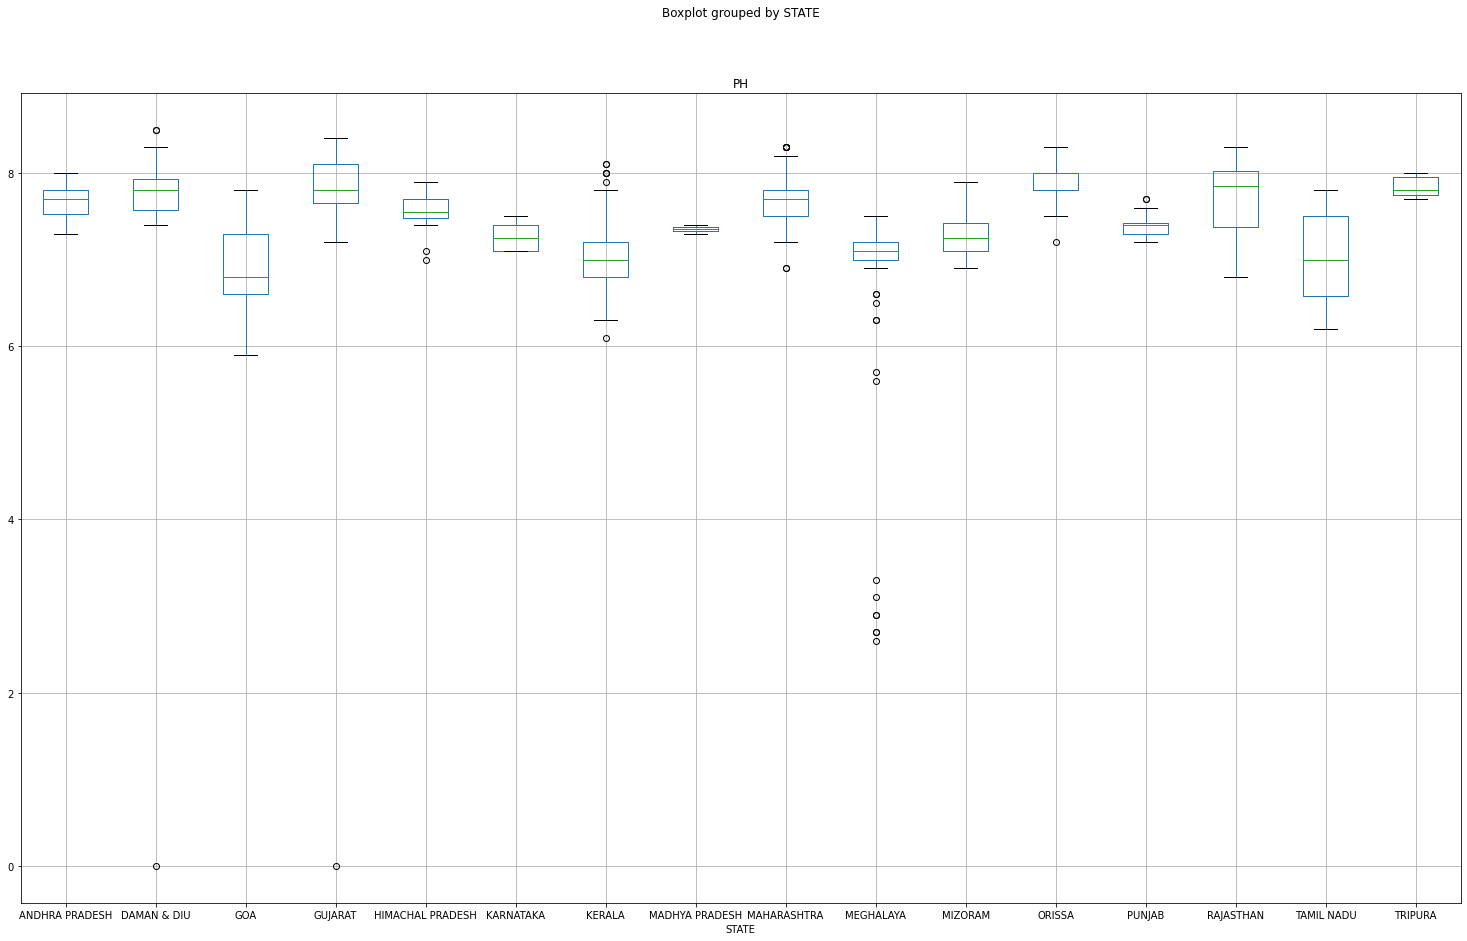

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))
plt.suptitle('')
dff.boxplot(column='PH', by='STATE',ax=ax)

**CALCULATING AND REMOVING OUTLIERS FOR EACH STATE FOR THE COLUMNS 'PH' , 'B.O.D. (mg/l)' AND 'TOTAL COLIFORM (MPN/100ml)Mean'  USING THE INTER QUARTILE RANGE BECAUSE THESE THREE COLUMNS ARE THE MOST IMPORTANT TO OUR INFERNCE AND PROVIDE MORE VALUABLE INFORMATION REGARDING WATER QUALITY THAN OTHER WATER QULAITY QUALIFIER COLUMNS**

In [ ]:
dff2 = dff[(dff['STATE'] == 'ANDHRA PRADESH')]

q75, q25 = np.percentile(dff2['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff2['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff2=dff2[dff2['PH'] != i]

q75, q25 = np.percentile(dff2['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff2['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff2=dff2[dff2['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff2['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff2['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff2=dff2[dff2['TOTAL COLIFORM (MPN/100ml)Mean'] != i]
              
              
              
              
              

In [ ]:
dff4 = dff[(dff['STATE'] == 'MIZORAM')]

q75, q25 = np.percentile(dff4['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff4['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff4=dff4[dff4['PH'] != i]

q75, q25 = np.percentile(dff4['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff4['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff4=dff4[dff4['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff4['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff4['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff4=dff4[dff4['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff5 = dff[(dff['STATE'] == 'DAMAN & DIU')]

q75, q25 = np.percentile(dff5['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff5['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff5=dff5[dff5['PH'] != i]

q75, q25 = np.percentile(dff5['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff5['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff5=dff5[dff5['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff5['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff5['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff5=dff5[dff5['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff8 = dff[(dff['STATE'] == 'TRIPURA')]

q75, q25 = np.percentile(dff8['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff2['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff8=dff8[dff8['PH'] != i]

q75, q25 = np.percentile(dff8['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff8['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff8=dff8[dff8['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff8['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff8['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff8=dff8[dff8['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff9 = dff[(dff['STATE'] == 'RAJASTHAN')]

q75, q25 = np.percentile(dff9['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff9['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff9=dff9[dff9['PH'] != i]

q75, q25 = np.percentile(dff9['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff9['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff9=dff9[dff9['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff9['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff9['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff9=dff9[dff9['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff10 = dff[(dff['STATE'] == 'MAHARASHTRA')]

q75, q25 = np.percentile(dff10['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff10['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff10=dff10[dff10['PH'] != i]

q75, q25 = np.percentile(dff10['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff10['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff10=dff10[dff10['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff10['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff10['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff10=dff10[dff10['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff13 = dff[(dff['STATE'] == 'MADHYA PRADESH')]

q75, q25 = np.percentile(dff13['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff13['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff13=dff13[dff13['PH'] != i]

q75, q25 = np.percentile(dff13['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in df13['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff13=dff13[dff13['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff13['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff13['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff13=dff13[dff13['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff14 = dff[(dff['STATE'] == 'KARNATAKA')]

q75, q25 = np.percentile(dff14['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff14['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff14=dff14[dff14['PH'] != i]

q75, q25 = np.percentile(dff14['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff14['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff14=dff14[dff14['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff14['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff14['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff14=dff14[dff14['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff15 = dff[(dff['STATE'] == 'HIMACHAL PRADESH')]

q75, q25 = np.percentile(dff15['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff15['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff15=dff15[dff15['PH'] != i]

q75, q25 = np.percentile(dff15['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff15['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff15=dff15[dff15['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff15['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff15['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff15=dff15[dff15['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff16 = dff[(dff['STATE'] == 'MEGHALAYA')]

q75, q25 = np.percentile(dff16['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff16['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff16=dff16[dff16['PH'] != i]

q75, q25 = np.percentile(dff16['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff16['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff16=dff16[dff16['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff16['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff16['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff16=dff16[dff16['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff17 = dff[(dff['STATE'] == 'GUJARAT')]

q75, q25 = np.percentile(dff17['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff17['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff17=dff17[dff17['PH'] != i]

q75, q25 = np.percentile(dff17['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff17['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff17=dff17[dff17['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff17['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff17['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff17=dff17[dff17['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff18 = dff[(dff['STATE'] == 'PUNJAB')]

q75, q25 = np.percentile(dff18['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff18['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff18=dff18[dff18['PH'] != i]

q75, q25 = np.percentile(dff18['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff18['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff18=dff18[dff18['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff18['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff18['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff18=dff18[dff18['TOTAL COLIFORM (MPN/100ml)Mean'] != i]


In [ ]:
dff19 = dff[(dff['STATE'] == 'GOA')]

q75, q25 = np.percentile(dff19['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff19['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff19=dff19[dff19['PH'] != i]

q75, q25 = np.percentile(dff19['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff19['B.O.D. (mg/l)']:
    if i<(q25-(1.5*iqr)):
        li.append(i)
    if i>(q75+(1.5*iqr)):
        li.append(i)
for i in li:
    dff19=dff19[dff19['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff19['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff19['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff19=dff19[dff19['TOTAL COLIFORM (MPN/100ml)Mean'] != i]

In [ ]:
dff22 = dff[(dff['STATE'] == 'TAMIL NADU')]

q75, q25 = np.percentile(dff22['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff22['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff22=dff22[dff22['PH'] != i]

q75, q25 = np.percentile(dff22['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff22['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff22=dff22[dff22['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff22['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff22['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff22=dff22[dff22['TOTAL COLIFORM (MPN/100ml)Mean'] != i]


In [ ]:
dff23 = dff[(dff['STATE'] == 'ORISSA')]

q75, q25 = np.percentile(dff23['PH'], [75,25])
iqr=q75-q25
li=[]
for i in dff23['PH']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff23=dff23[dff23['PH'] != i]

q75, q25 = np.percentile(dff23['B.O.D. (mg/l)'], [75,25])
iqr=q75-q25
li=[]
for i in dff23['B.O.D. (mg/l)']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff23=dff23[dff23['B.O.D. (mg/l)'] != i]


q75, q25 = np.percentile(dff23['TOTAL COLIFORM (MPN/100ml)Mean'], [75,25])
iqr=q75-q25
li=[]
for i in dff23['TOTAL COLIFORM (MPN/100ml)Mean']:
    if i<(q25-1.5*iqr):
        li.append(i)
    if i>(q75+1.5*iqr):
        li.append(i)
for i in li:
    dff23=dff23[dff23['TOTAL COLIFORM (MPN/100ml)Mean'] != i]


**NOW COMBINING ALL THE SUB DATA-SETS FOR EACH STATE WITH OUTLIERS REMOVED TO CREATE A NEW DATA-SET WHICH HAS NO OUTLIERS AND ANY KIND OF ERRORS**

In [ ]:
frames1=[dff2,dff4,dff5,dff8,dff9,dff10,dff13,dff14,dff15,dff16,dff17,dff18,dff19,dff22,dff23]
dfff=pd.concat(frames1)

**FROM NOW dfff IS OUR NEW UPDATED DATA SET**

In [ ]:
dfff

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
136,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,25.9,5.5,7.6,569.0,1.3,0.90,18.0,141.0,2014-01-01
137,2352.0,"RIVER VAMSHADHARA, KALINGAPATNAM,VIZIANAGARAM",ANDHRA PRADESH,26.5,5.4,7.8,310.0,0.8,2.40,7.0,107.0,2014-01-01
138,3080.0,"U/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,18.9,7.1,7.8,516.0,0.7,0.50,2.0,1238.0,2014-01-01
139,3081.0,"D/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,20.5,6.9,8.0,505.0,0.9,0.70,2.0,1563.0,2014-01-01
394,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,27.0,6.0,7.3,432.0,1.2,3.00,3.0,78.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
944,1643.0,"NAGAVALLI AT RAYAGADA D/S, ORISSA",ORISSA,24.8,7.4,8.0,263.0,1.7,0.65,3113.0,6617.0,2011-01-01
945,1455.0,"RUSHIKULYA AT GANJAM U/S, ORISSA",ORISSA,27.5,8.1,8.0,300.0,2.3,0.45,2272.0,4569.0,2011-01-01
946,1456.0,"RUSHIKULYA AT GANJAM D/S, ORISSA",ORISSA,28.0,7.8,8.0,13103.0,2.1,0.59,277.0,739.0,2011-01-01
947,2426.0,VANSADHARA AT MUNIGUDA (D/S OF M/S VEDANTAALUM...,ORISSA,25.0,7.4,8.0,207.0,1.5,0.53,1356.0,2872.0,2011-01-01


**VERIFYING THAT OUTLIERS ARE REMOVED BY PLOTTING BOX PLOT FOR SOME OF THE STATES FOR THE COLUMN B.O.D. (mg/l)**

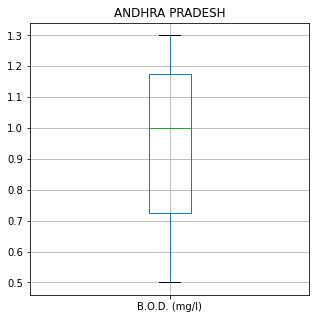

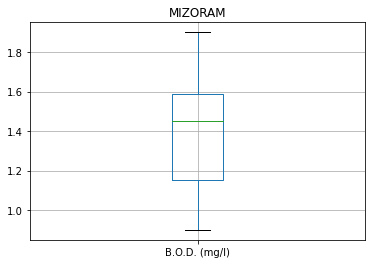

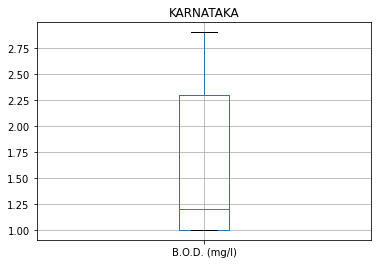

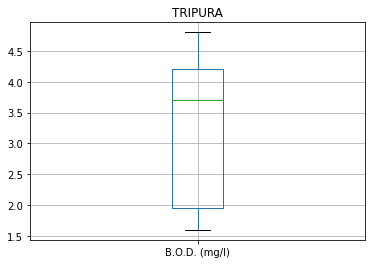

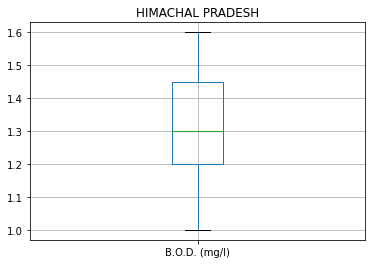

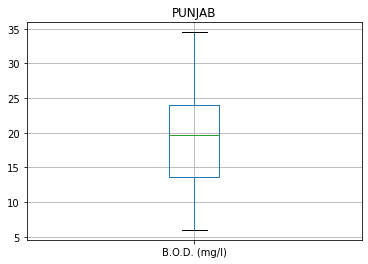

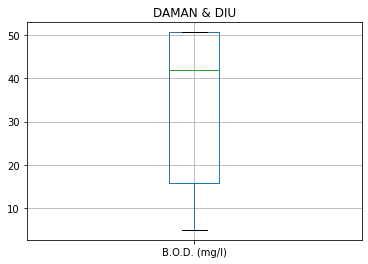

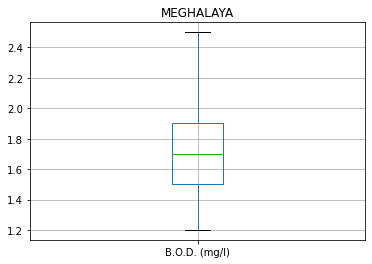

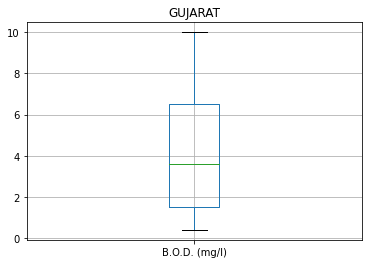

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))

boxplot = dff2.boxplot(column=['B.O.D. (mg/l)'])
plt.title("ANDHRA PRADESH") 
plt.show()

boxplot = dff4.boxplot(column=['B.O.D. (mg/l)'])
plt.title("MIZORAM") 
plt.show()

boxplot = dff14.boxplot(column=['B.O.D. (mg/l)'])
plt.title("KARNATAKA") 
plt.show()

boxplot = dff8.boxplot(column=['B.O.D. (mg/l)'])
plt.title("TRIPURA") 
plt.show()

boxplot = dff15.boxplot(column=['B.O.D. (mg/l)'])
plt.title("HIMACHAL PRADESH") 
plt.show()

boxplot = dff18.boxplot(column=['B.O.D. (mg/l)'])
plt.title("PUNJAB") 
plt.show()

boxplot = dff5.boxplot(column=['B.O.D. (mg/l)'])
plt.title("DAMAN & DIU") 
plt.show()

boxplot = dff16.boxplot(column=['B.O.D. (mg/l)'])
plt.title("MEGHALAYA") 
plt.show()

boxplot = dff17.boxplot(column=['B.O.D. (mg/l)'])
plt.title("GUJARAT") 
plt.show()


**NOW PLOTTING HISTOGRAMS FOR ALL THE STATE'S PH VALUES SINCE PH OF WATER INDICATES IF ITS NEUTRAL ,ACIDIC OR BASIC WHICH IS ONE OF THE IMPORTANT WATER TESTING QULAIFIER**

Text(0.5, 1.0, 'ANDHRA PRADESH')

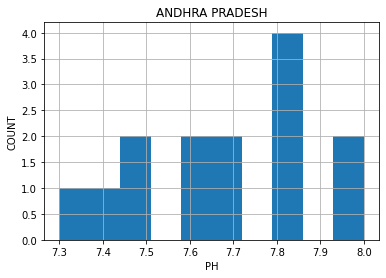

In [ ]:
dfff2 = dfff[(dfff['STATE'] == 'ANDHRA PRADESH')]
hist=dfff2['PH'].hist() 
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("ANDHRA PRADESH")





Text(0.5, 1.0, 'MAHARASHTRA')

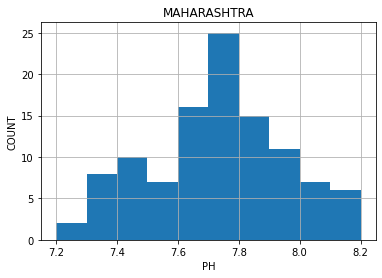

In [ ]:
dfff3 = dfff[(dfff['STATE'] == 'MAHARASHTRA')]
hist=dfff3['PH'].hist()
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("MAHARASHTRA")


Text(0.5, 1.0, 'ORISSA')

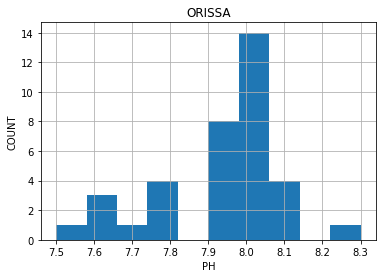

In [ ]:
dfff4 = dfff[(dfff['STATE'] == 'ORISSA')]
hist=dfff4['PH'].hist() 
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("ORISSA")

Text(0.5, 1.0, 'PUNJAB')

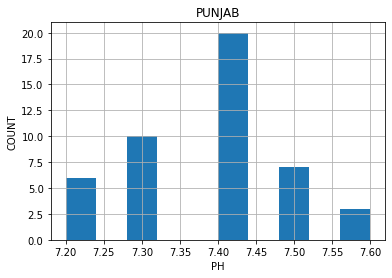

In [ ]:
dfff5 = dfff[(dfff['STATE'] == 'PUNJAB')]
hist=dfff5['PH'].hist() 
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("PUNJAB")

Text(0.5, 1.0, 'TRIPURA')

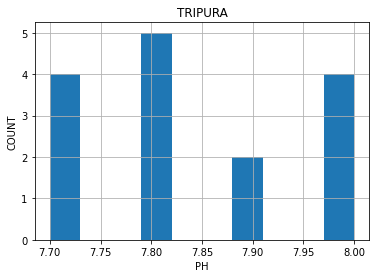

In [ ]:
dfff8 = dfff[(dfff['STATE'] == 'TRIPURA')]
hist=dfff8['PH'].hist() 
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("TRIPURA")

Text(0.5, 1.0, 'MADHYA PRADESH')

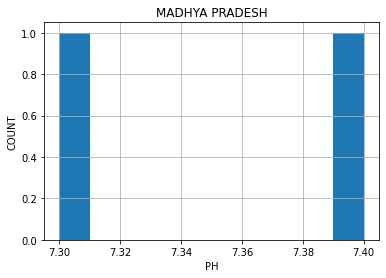

In [ ]:
dfff9 = dfff[(dfff['STATE'] == 'MADHYA PRADESH')]
hist=dfff9['PH'].hist() 
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("MADHYA PRADESH")

Text(0.5, 1.0, 'GOA')

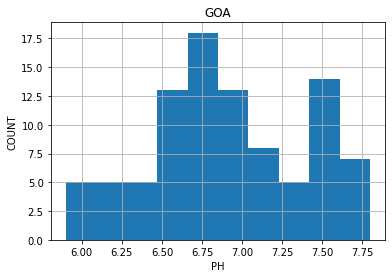

In [ ]:
dfff10 = dfff[(dfff['STATE'] == 'GOA')]
hist=dfff10['PH'].hist()  
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("GOA")

Text(0.5, 1.0, 'KARNATAKA')

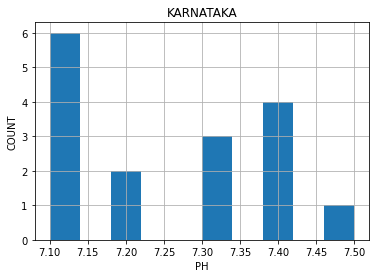

In [ ]:
dfff12 = dfff[(dfff['STATE'] == 'KARNATAKA')]
hist=dfff12['PH'].hist()  
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("KARNATAKA")



Text(0.5, 1.0, 'MIZORAM')

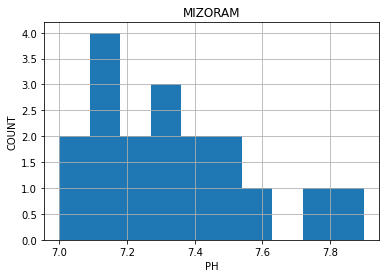

In [ ]:
dfff13 = dfff[(dfff['STATE'] == 'MIZORAM')]
hist=dfff13['PH'].hist()  
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("MIZORAM")

Text(0.5, 1.0, 'RAJASTHAN')

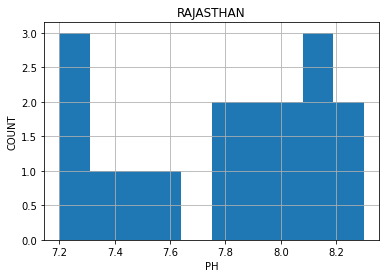

In [ ]:
dfff14 = dfff[(dfff['STATE'] == 'RAJASTHAN')]
hist=dfff14['PH'].hist()    
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("RAJASTHAN")

Text(0.5, 1.0, 'HIMACHAL PRADESH')

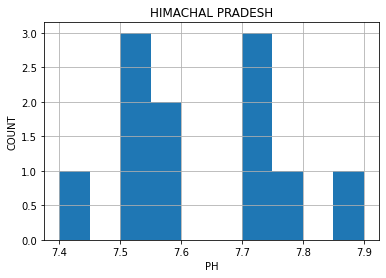

In [ ]:
dfff15 = dfff[(dfff['STATE'] == 'HIMACHAL PRADESH')]
hist=dfff15['PH'].hist()     
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("HIMACHAL PRADESH")

Text(0.5, 1.0, 'MEGHALAYA')

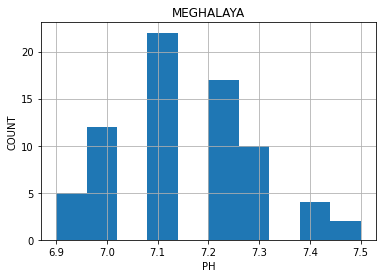

In [ ]:
dfff16 = dfff[(dfff['STATE'] == 'MEGHALAYA')]
hist=dfff16['PH'].hist()     
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("MEGHALAYA")

Text(0.5, 1.0, 'GUJARAT')

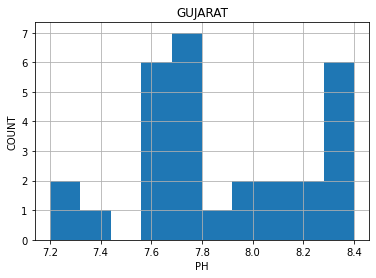

In [ ]:
dfff17 = dfff[(dfff['STATE'] == 'GUJARAT')]
hist=dfff17['PH'].hist()     
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("GUJARAT")

Text(0.5, 1.0, 'TAMIL NADU')

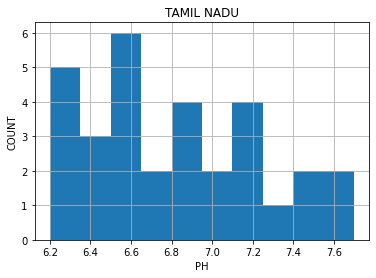

In [ ]:
dfff18 = dfff[(dfff['STATE'] == 'TAMIL NADU')]
hist=dfff18['PH'].hist()      
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("TAMIL NADU")

Text(0.5, 1.0, 'DAMAN & DIU')

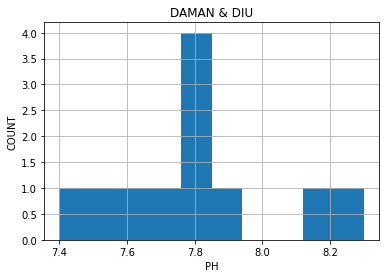

In [ ]:
dfff19 = dfff[(dfff['STATE'] == 'DAMAN & DIU')]
hist=dfff19['PH'].hist()      
plt.xlabel('PH')
plt.ylabel("COUNT")
plt.title("DAMAN & DIU")

**USE dfff AS UR DATA SET FROM NOW SINCE ITS THE UPDATED ONE WITH OUTLIERS REMOVED FOR PH ,BOD AND TOTAL COLORIFORM**

In [ ]:
dfff

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
136,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,25.9,5.5,7.6,569.0,1.3,0.90,18.0,141.0,2014-01-01
137,2352.0,"RIVER VAMSHADHARA, KALINGAPATNAM,VIZIANAGARAM",ANDHRA PRADESH,26.5,5.4,7.8,310.0,0.8,2.40,7.0,107.0,2014-01-01
138,3080.0,"U/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,18.9,7.1,7.8,516.0,0.7,0.50,2.0,1238.0,2014-01-01
139,3081.0,"D/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,20.5,6.9,8.0,505.0,0.9,0.70,2.0,1563.0,2014-01-01
394,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,27.0,6.0,7.3,432.0,1.2,3.00,3.0,78.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
944,1643.0,"NAGAVALLI AT RAYAGADA D/S, ORISSA",ORISSA,24.8,7.4,8.0,263.0,1.7,0.65,3113.0,6617.0,2011-01-01
945,1455.0,"RUSHIKULYA AT GANJAM U/S, ORISSA",ORISSA,27.5,8.1,8.0,300.0,2.3,0.45,2272.0,4569.0,2011-01-01
946,1456.0,"RUSHIKULYA AT GANJAM D/S, ORISSA",ORISSA,28.0,7.8,8.0,13103.0,2.1,0.59,277.0,739.0,2011-01-01
947,2426.0,VANSADHARA AT MUNIGUDA (D/S OF M/S VEDANTAALUM...,ORISSA,25.0,7.4,8.0,207.0,1.5,0.53,1356.0,2872.0,2011-01-01


**for bar chart and pie chart use poi data set since it only contains states and total coliform**

In [ ]:
poi=dfff[['STATE','TOTAL COLIFORM (MPN/100ml)Mean']]
poi

,STATE,TOTAL COLIFORM (MPN/100ml)Mean
136,ANDHRA PRADESH,141.0
137,ANDHRA PRADESH,107.0
138,ANDHRA PRADESH,1238.0
139,ANDHRA PRADESH,1563.0
394,ANDHRA PRADESH,78.0
...,...,...
944,ORISSA,6617.0
945,ORISSA,4569.0
946,ORISSA,739.0
947,ORISSA,2872.0


**Grouping different states together to create a single entry for each state with value as mean of 'TOTAL COLIFORM (MPN/100ml)Mean' for different years**

In [ ]:
grph = poi.groupby('STATE').mean().reset_index()
grph

,STATE,TOTAL COLIFORM (MPN/100ml)Mean
0,ANDHRA PRADESH,729.857143
1,DAMAN & DIU,86.400000
2,GOA,4353.419355
3,GUJARAT,1720.233020
4,HIMACHAL PRADESH,20.363636
5,KARNATAKA,502.125000
6,MADHYA PRADESH,39.000000
7,MAHARASHTRA,88.111487
8,MEGHALAYA,47.736111
9,MIZORAM,139.277778


**Plotting Bar Graph depicting the Total Coliform Level for Different States**

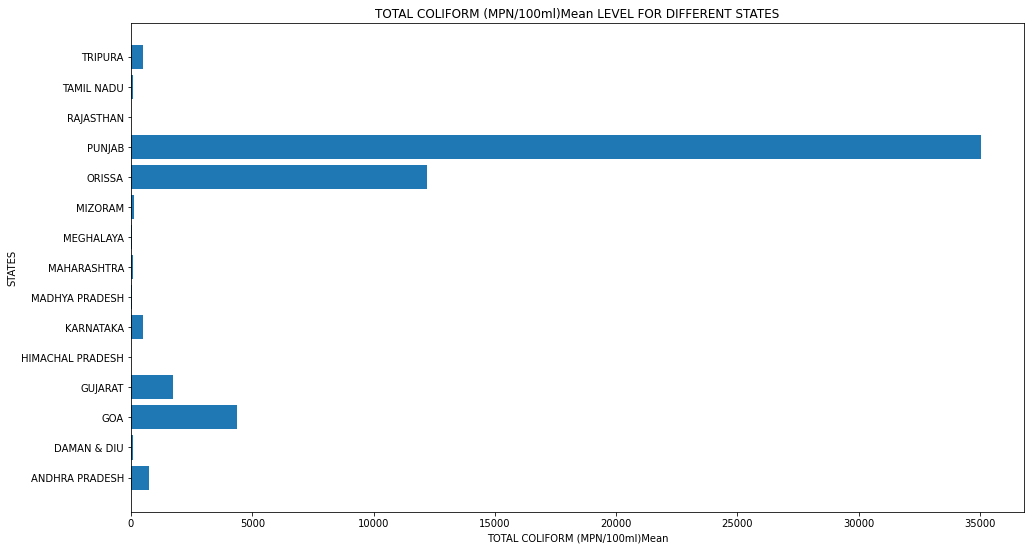

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
plt.barh(grph["STATE"],grph["TOTAL COLIFORM (MPN/100ml)Mean"])
plt.xlabel("TOTAL COLIFORM (MPN/100ml)Mean")
plt.ylabel("STATES")
plt.title("TOTAL COLIFORM (MPN/100ml)Mean LEVEL FOR DIFFERENT STATES")
plt.show()

**Plotting Pie Chart Depicting the Total Coliform Level for Different States**

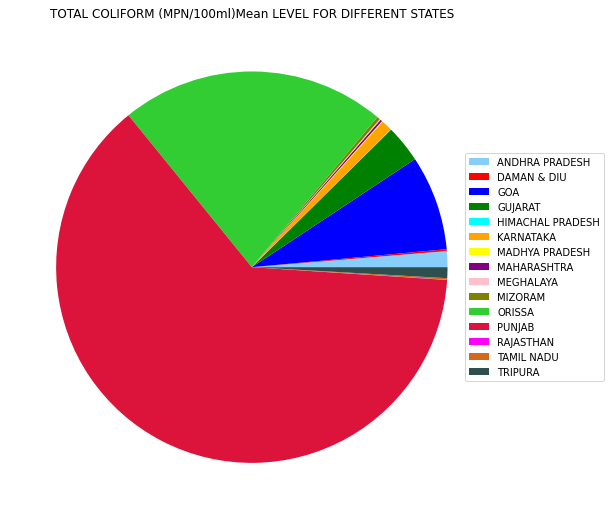

In [ ]:
colors = ['lightskyblue', 'red', 'blue', 'green','cyan','orange','yellow','purple','pink','olive','limegreen','crimson','magenta','chocolate','darkslategrey']
plt.pie(grph["TOTAL COLIFORM (MPN/100ml)Mean"],colors=colors)
plt.legend(labels=grph["STATE"],bbox_to_anchor=(1.23,0.5),loc="center right")
plt.title("TOTAL COLIFORM (MPN/100ml)Mean LEVEL FOR DIFFERENT STATES")
plt.show()

**Grouping different states together to create a single entry for each state with value as mean of 'PH' and 'B.O.D. (mg/l)' for different years**

In [ ]:
poi1=dfff[['STATE','PH']]
poi2=dfff[['STATE','B.O.D. (mg/l)']]
grph1=poi1.groupby('STATE').mean().reset_index()
grph2=poi2.groupby('STATE').mean().reset_index()

**potting bar graph for various states vs PH**

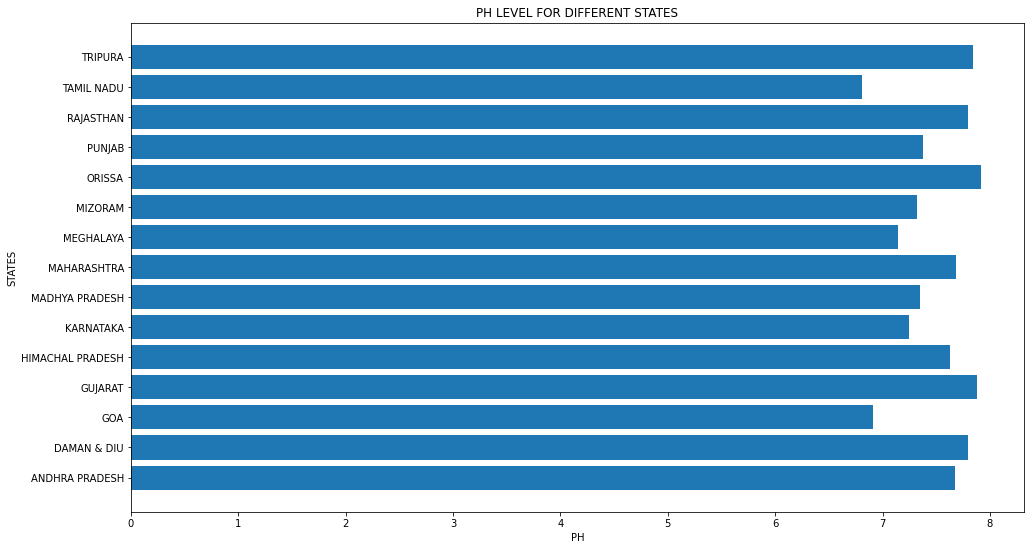

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
plt.barh(grph1["STATE"],grph1["PH"])
plt.xlabel("PH")
plt.ylabel("STATES")
plt.title("PH LEVEL FOR DIFFERENT STATES")
plt.show()

**plotting bar graph for various states vs B.O.D. (mg/l)**

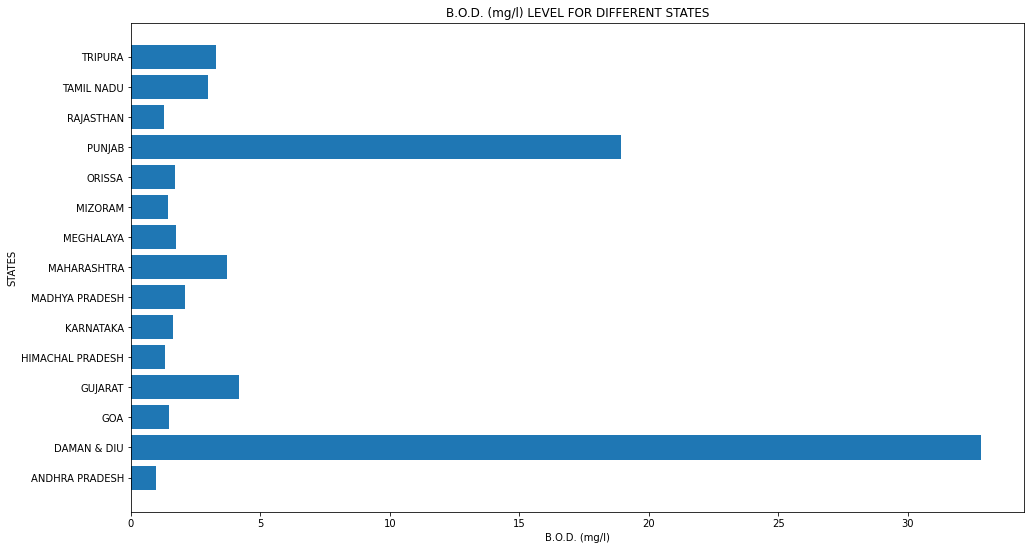

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
plt.barh(grph2["STATE"],grph2["B.O.D. (mg/l)"])
plt.xlabel("B.O.D. (mg/l)")
plt.ylabel("STATES")
plt.title("B.O.D. (mg/l) LEVEL FOR DIFFERENT STATES")
plt.show()

**Making a Copy of dfff**

In [ ]:
hypdf=dfff.copy()
hypdf

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
136,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,25.9,5.5,7.6,569.0,1.3,0.90,18.0,141.0,2014-01-01
137,2352.0,"RIVER VAMSHADHARA, KALINGAPATNAM,VIZIANAGARAM",ANDHRA PRADESH,26.5,5.4,7.8,310.0,0.8,2.40,7.0,107.0,2014-01-01
138,3080.0,"U/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,18.9,7.1,7.8,516.0,0.7,0.50,2.0,1238.0,2014-01-01
139,3081.0,"D/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,20.5,6.9,8.0,505.0,0.9,0.70,2.0,1563.0,2014-01-01
394,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,27.0,6.0,7.3,432.0,1.2,3.00,3.0,78.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
944,1643.0,"NAGAVALLI AT RAYAGADA D/S, ORISSA",ORISSA,24.8,7.4,8.0,263.0,1.7,0.65,3113.0,6617.0,2011-01-01
945,1455.0,"RUSHIKULYA AT GANJAM U/S, ORISSA",ORISSA,27.5,8.1,8.0,300.0,2.3,0.45,2272.0,4569.0,2011-01-01
946,1456.0,"RUSHIKULYA AT GANJAM D/S, ORISSA",ORISSA,28.0,7.8,8.0,13103.0,2.1,0.59,277.0,739.0,2011-01-01
947,2426.0,VANSADHARA AT MUNIGUDA (D/S OF M/S VEDANTAALUM...,ORISSA,25.0,7.4,8.0,207.0,1.5,0.53,1356.0,2872.0,2011-01-01


**making a sub data frame by combining only the numerical columns in order to NORMALIZE the values**

In [ ]:
mvsd=dfff[['Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']]
mvsd

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
136,25.9,5.5,7.6,569.0,1.3,0.90,18.0,141.0
137,26.5,5.4,7.8,310.0,0.8,2.40,7.0,107.0
138,18.9,7.1,7.8,516.0,0.7,0.50,2.0,1238.0
139,20.5,6.9,8.0,505.0,0.9,0.70,2.0,1563.0
394,27.0,6.0,7.3,432.0,1.2,3.00,3.0,78.0
...,...,...,...,...,...,...,...,...
944,24.8,7.4,8.0,263.0,1.7,0.65,3113.0,6617.0
945,27.5,8.1,8.0,300.0,2.3,0.45,2272.0,4569.0
946,28.0,7.8,8.0,13103.0,2.1,0.59,277.0,739.0
947,25.0,7.4,8.0,207.0,1.5,0.53,1356.0,2872.0


**MEAN OF THE NUMERICAL COLUMNS BEFORE NORMALIZING**

In [ ]:
mvsd.mean()

Temp                                  25.812801
D.O. (mg/l)                            6.562606
PH                                     7.400921
CONDUCTIVITY (µmhos/cm)             1125.322848
B.O.D. (mg/l)                          4.485831
NITRATENAN N+ NITRITENANN (mg/l)       1.825922
FECAL COLIFORM (MPN/100ml)          2581.063140
TOTAL COLIFORM (MPN/100ml)Mean      4923.428637
dtype: float64

**VARIANCE OF THE NUMERICAL COLUMNS BEFORE NORMALIZING**

In [ ]:
mvsd.var()

Temp                                1.157279e+01
D.O. (mg/l)                         9.202564e-01
PH                                  2.280146e-01
CONDUCTIVITY (µmhos/cm)             1.868846e+07
B.O.D. (mg/l)                       5.288530e+01
NITRATENAN N+ NITRITENANN (mg/l)    8.036496e+00
FECAL COLIFORM (MPN/100ml)          4.168043e+07
TOTAL COLIFORM (MPN/100ml)Mean      1.469363e+08
dtype: float64

**STANDARD DEVIATION OF THE NUMERICAL COLUMNS BEFORE NORMALIZING**

In [ ]:
mvsd.std()

Temp                                    3.401881
D.O. (mg/l)                             0.959300
PH                                      0.477509
CONDUCTIVITY (µmhos/cm)              4323.014740
B.O.D. (mg/l)                           7.272228
NITRATENAN N+ NITRITENANN (mg/l)        2.834871
FECAL COLIFORM (MPN/100ml)           6456.038389
TOTAL COLIFORM (MPN/100ml)Mean      12121.729795
dtype: float64

**NORMALIZING THE NUMERICAL COLUMNS BY CALCULATING Z SCORE WHICH IS 
Z = (X - μ)/ σ  TO HAVE MEAN 0 AND VARIANCE 1**

In [ ]:
mvsd['Temp'].iloc[::] = mvsd['Temp'].iloc[::].apply(lambda x: (x-mvsd['Temp'].mean())/ mvsd['Temp'].std())
mvsd['B.O.D. (mg/l)'].iloc[::] = mvsd['B.O.D. (mg/l)'].iloc[::].apply(lambda x: (x-mvsd['B.O.D. (mg/l)'].mean())/ mvsd['B.O.D. (mg/l)'].std())
mvsd['D.O. (mg/l)'].iloc[::] = mvsd['D.O. (mg/l)'].iloc[::].apply(lambda x: (x-mvsd['D.O. (mg/l)'].mean())/ mvsd['D.O. (mg/l)'].std())
mvsd['PH'].iloc[::] = mvsd['PH'].iloc[::].apply(lambda x: (x-mvsd['PH'].mean())/ mvsd['PH'].std())
mvsd['CONDUCTIVITY (µmhos/cm)'].iloc[::] = mvsd['CONDUCTIVITY (µmhos/cm)'].iloc[::].apply(lambda x: (x-mvsd['CONDUCTIVITY (µmhos/cm)'].mean())/ mvsd['CONDUCTIVITY (µmhos/cm)'].std())
mvsd['NITRATENAN N+ NITRITENANN (mg/l)'].iloc[::] = mvsd['NITRATENAN N+ NITRITENANN (mg/l)'].iloc[::].apply(lambda x: (x-mvsd['NITRATENAN N+ NITRITENANN (mg/l)'].mean())/ mvsd['NITRATENAN N+ NITRITENANN (mg/l)'].std())
mvsd['FECAL COLIFORM (MPN/100ml)'].iloc[::] = mvsd['FECAL COLIFORM (MPN/100ml)'].iloc[::].apply(lambda x: (x-mvsd['FECAL COLIFORM (MPN/100ml)'].mean())/ mvsd['FECAL COLIFORM (MPN/100ml)'].std())
mvsd['TOTAL COLIFORM (MPN/100ml)Mean'].iloc[::] = mvsd['TOTAL COLIFORM (MPN/100ml)Mean'].iloc[::].apply(lambda x: (x-mvsd['TOTAL COLIFORM (MPN/100ml)Mean'].mean())/ mvsd['TOTAL COLIFORM (MPN/100ml)Mean'].std())

**THE NUMERICAL COLUMNS AFTER NORMALIZING**

In [ ]:
mvsd

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
136,0.025632,-1.107689,0.416911,-0.128689,-0.438082,-0.326619,-0.397002,-0.394534
137,0.202006,-1.211932,0.835752,-0.188601,-0.506837,0.202506,-0.398706,-0.397338
138,-2.032053,0.560194,0.835752,-0.140949,-0.520587,-0.467718,-0.399481,-0.304035
139,-1.561725,0.351708,1.254593,-0.143493,-0.493086,-0.397169,-0.399481,-0.277224
394,0.348983,-0.586476,-0.211349,-0.160379,-0.451833,0.414156,-0.399326,-0.399731
...,...,...,...,...,...,...,...,...
944,-0.297718,0.872922,1.254593,-0.199473,-0.383078,-0.414806,0.082394,0.139714
945,0.495961,1.602621,1.254593,-0.190914,-0.300572,-0.485356,-0.047872,-0.029239
946,0.642938,1.289892,1.254593,2.770677,-0.328074,-0.435971,-0.356885,-0.345201
947,-0.238927,0.872922,1.254593,-0.212426,-0.410580,-0.457136,-0.189755,-0.169236


**NOW UPDATING OUR DATA FRAME WITH THE NORMALIZED NUMRICAL COLUMNS**

In [ ]:
dfff['Temp']=mvsd['Temp']
dfff['B.O.D. (mg/l)']=mvsd['B.O.D. (mg/l)']
dfff['D.O. (mg/l)']=mvsd['D.O. (mg/l)']
dfff['PH']=mvsd['PH']
dfff['CONDUCTIVITY (µmhos/cm)']=mvsd['CONDUCTIVITY (µmhos/cm)']
dfff['NITRATENAN N+ NITRITENANN (mg/l)']=mvsd['NITRATENAN N+ NITRITENANN (mg/l)']
dfff['FECAL COLIFORM (MPN/100ml)']=mvsd['FECAL COLIFORM (MPN/100ml)']
dfff['TOTAL COLIFORM (MPN/100ml)Mean']=mvsd['TOTAL COLIFORM (MPN/100ml)Mean']

**THE DATA SET NOW HAS ALL NUMERICAL COLUMNS NORMALIZED TO HAVE MEAN 0 AND VARIANCE 1**

In [ ]:
dfff

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
136,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,0.025632,-1.107689,0.416911,-0.128689,-0.438082,-0.326619,-0.397002,-0.394534,2014-01-01
137,2352.0,"RIVER VAMSHADHARA, KALINGAPATNAM,VIZIANAGARAM",ANDHRA PRADESH,0.202006,-1.211932,0.835752,-0.188601,-0.506837,0.202506,-0.398706,-0.397338,2014-01-01
138,3080.0,"U/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,-2.032053,0.560194,0.835752,-0.140949,-0.520587,-0.467718,-0.399481,-0.304035,2014-01-01
139,3081.0,"D/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,-1.561725,0.351708,1.254593,-0.143493,-0.493086,-0.397169,-0.399481,-0.277224,2014-01-01
394,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,0.348983,-0.586476,-0.211349,-0.160379,-0.451833,0.414156,-0.399326,-0.399731,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
944,1643.0,"NAGAVALLI AT RAYAGADA D/S, ORISSA",ORISSA,-0.297718,0.872922,1.254593,-0.199473,-0.383078,-0.414806,0.082394,0.139714,2011-01-01
945,1455.0,"RUSHIKULYA AT GANJAM U/S, ORISSA",ORISSA,0.495961,1.602621,1.254593,-0.190914,-0.300572,-0.485356,-0.047872,-0.029239,2011-01-01
946,1456.0,"RUSHIKULYA AT GANJAM D/S, ORISSA",ORISSA,0.642938,1.289892,1.254593,2.770677,-0.328074,-0.435971,-0.356885,-0.345201,2011-01-01
947,2426.0,VANSADHARA AT MUNIGUDA (D/S OF M/S VEDANTAALUM...,ORISSA,-0.238927,0.872922,1.254593,-0.212426,-0.410580,-0.457136,-0.189755,-0.169236,2011-01-01


**MEAN OF THE VARIOUS NUMERICAL COLUMNS NOW IS APPROXIMATELY 0**

In [ ]:
dfff.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Temp                                1.402089e-14
D.O. (mg/l)                        -2.579447e-15
PH                                  1.940104e-15
CONDUCTIVITY (µmhos/cm)             1.135942e-17
B.O.D. (mg/l)                      -2.141144e-16
NITRATENAN N+ NITRITENANN (mg/l)   -8.252729e-16
FECAL COLIFORM (MPN/100ml)         -6.376281e-17
TOTAL COLIFORM (MPN/100ml)Mean     -3.611440e-17
dtype: float64

**VARIANCE OF THE VARIOUS NUMERICAL COLUMNS NOW IS 1**

In [ ]:
dfff.var()

Temp                                1.0
D.O. (mg/l)                         1.0
PH                                  1.0
CONDUCTIVITY (µmhos/cm)             1.0
B.O.D. (mg/l)                       1.0
NITRATENAN N+ NITRITENANN (mg/l)    1.0
FECAL COLIFORM (MPN/100ml)          1.0
TOTAL COLIFORM (MPN/100ml)Mean      1.0
dtype: float64

**STANDARD DEVIATION OF THE VARIOUS NUMERICAL COLUMNS NOW IS 1**

In [ ]:
dfff.std()

Temp                                1.0
D.O. (mg/l)                         1.0
PH                                  1.0
CONDUCTIVITY (µmhos/cm)             1.0
B.O.D. (mg/l)                       1.0
NITRATENAN N+ NITRITENANN (mg/l)    1.0
FECAL COLIFORM (MPN/100ml)          1.0
TOTAL COLIFORM (MPN/100ml)Mean      1.0
dtype: float64

**PLOTTING DISTPLOT TO SHOW THE NORMALITY OF THE DATA**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

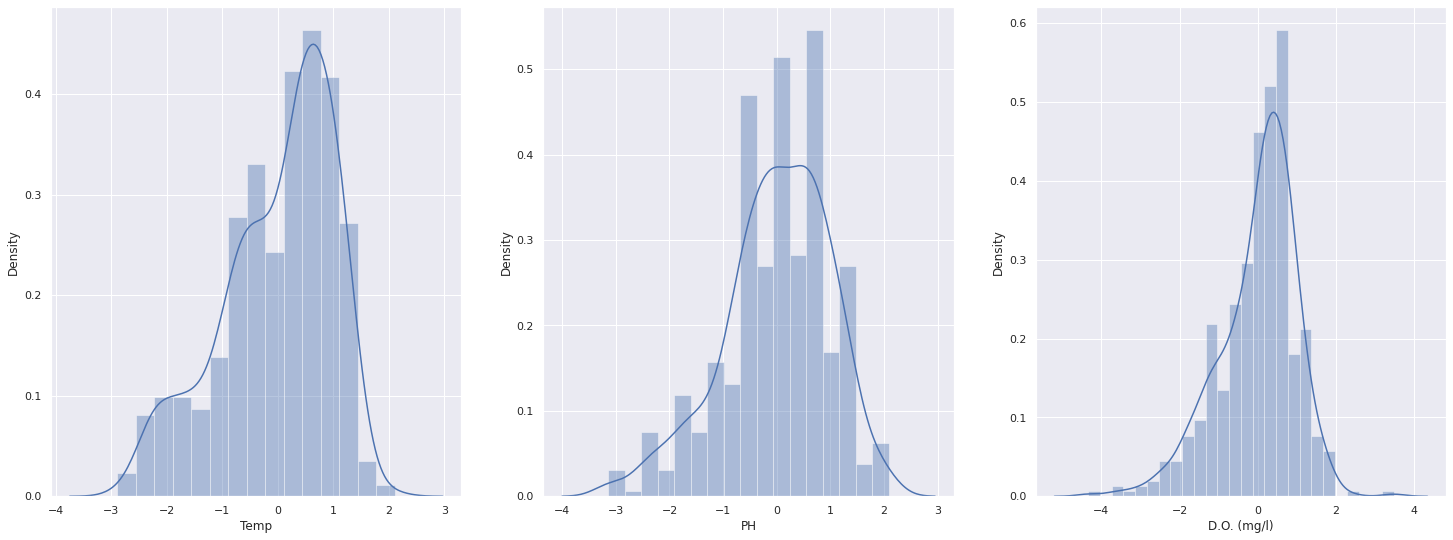

In [ ]:
sns.set(rc={'figure.figsize':(25,9)})
fig, (ax1, ax2, ax3)=plt.subplots(1,3)
sns.distplot(dfff['Temp'], ax=ax1)
sns.distplot(dfff['PH'], ax=ax2)
sns.distplot(dfff['D.O. (mg/l)'], ax=ax3)

**SOME OF THE NUMERICAL COLUMNS ARE RIGHT SKEWED NORMAL DISTRIBUTION**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

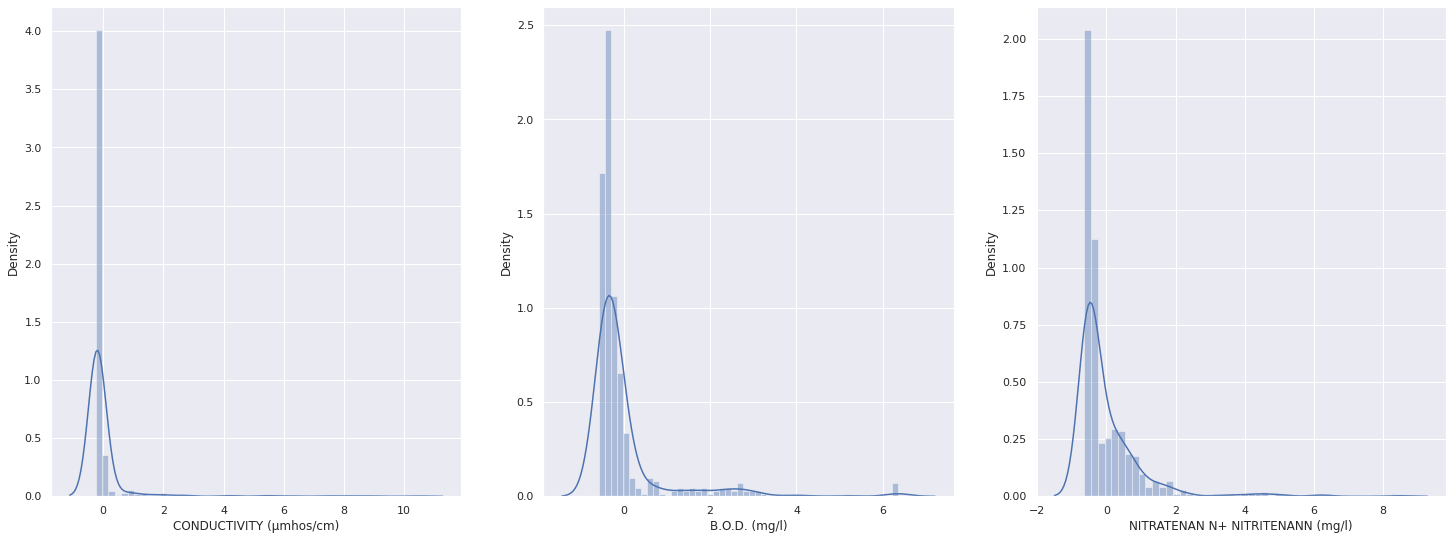

In [ ]:
sns.set(rc={'figure.figsize':(25,9)})
fig, (ax1,ax2,ax3)=plt.subplots(1,3)
sns.distplot(dfff['CONDUCTIVITY (µmhos/cm)'], ax=ax1)
sns.distplot(dfff['B.O.D. (mg/l)'], ax=ax2)
sns.distplot(dfff['NITRATENAN N+ NITRITENANN (mg/l)'], ax=ax3)

**SOME OF THE NUMERICAL COLUMNS ARE RIGHT SKEWED NORMAL DISTRIBUTION**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


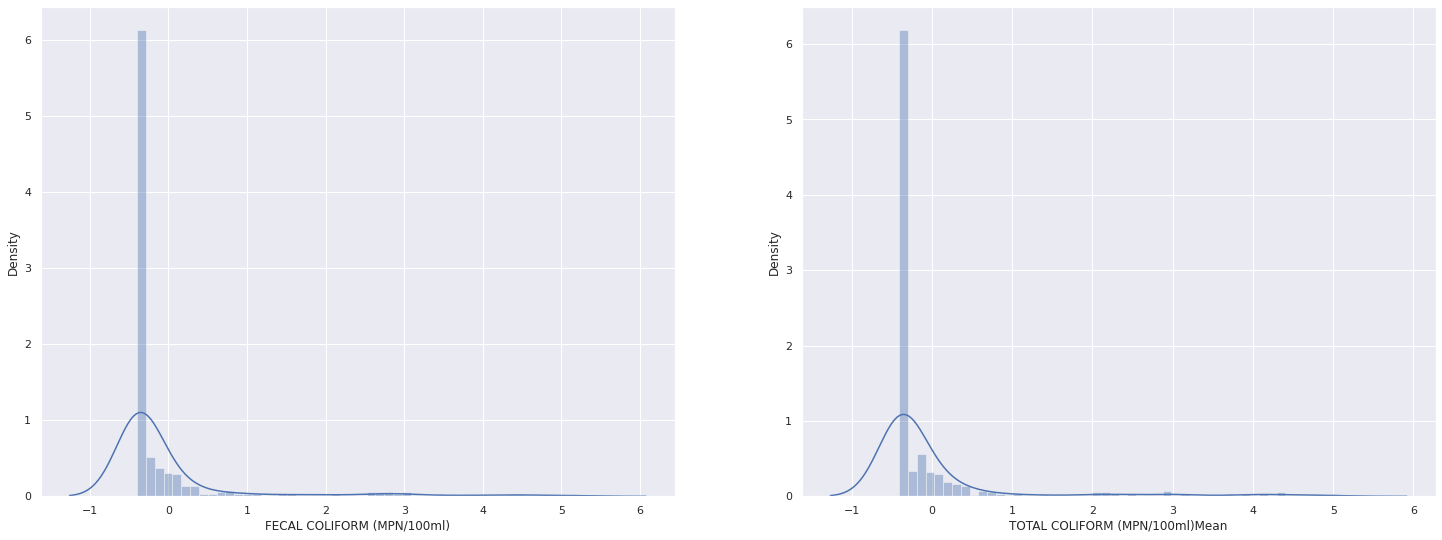

In [ ]:
sns.set(rc={'figure.figsize':(25,9)})
fig, (ax1,ax2)=plt.subplots(1,2)
sns.distplot(dfff['FECAL COLIFORM (MPN/100ml)'], ax=ax1)
sns.distplot(dfff['TOTAL COLIFORM (MPN/100ml)Mean'], ax=ax2)

**PLOTTING NORMAL PROBABILITY PLOT TO  SHOW THE NORMALITY OF THE DATA**

Text(0.5, 0, 'D.O. (mg/l)')

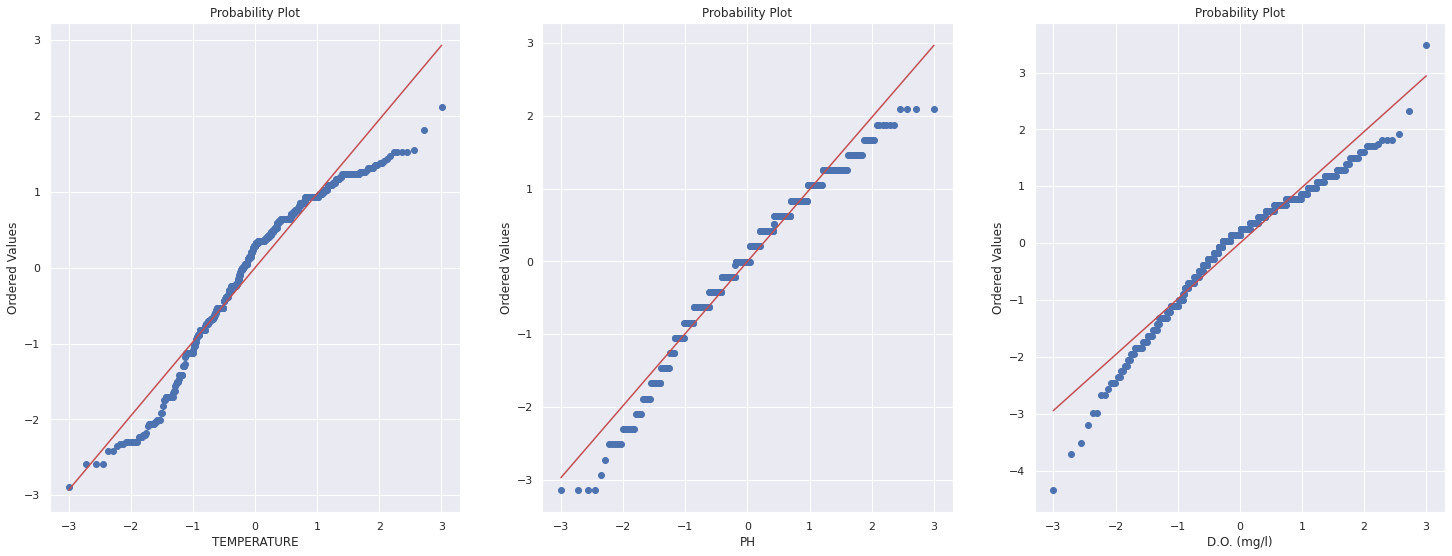

In [ ]:
fig1, (ax1, ax2, ax3)=plt.subplots(1,3)
stats.probplot(dfff['Temp'], plot=ax1)
stats.probplot(dfff['PH'], plot=ax2)
stats.probplot(dfff['D.O. (mg/l)'], plot=ax3)
ax1.set_xlabel('TEMPERATURE')
ax2.set_xlabel('PH')
ax3.set_xlabel('D.O. (mg/l)')

**SINCE SOME OF THE NUMERICAL COLUMNS ARE RIGHT SKEWED NORMAL DISTRIBUTION SO WE GET POINTS BELOW THE STRAIGHT LINE IN THE NORMAL PROBABILITY PLOT**

Text(0.5, 0, 'NITRATENAN N+ NITRITENANN (mg/l)')

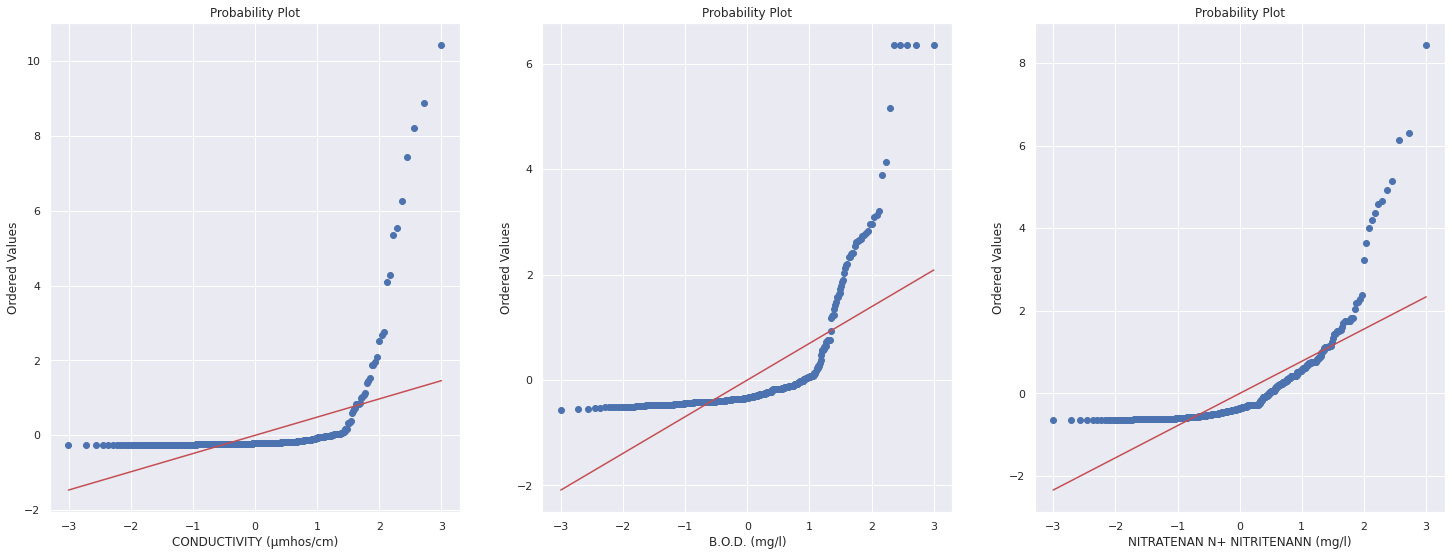

In [ ]:
fig1, (ax1, ax2, ax3)=plt.subplots(1,3)
stats.probplot(dfff['CONDUCTIVITY (µmhos/cm)'], plot=ax1)
stats.probplot(dfff['B.O.D. (mg/l)'], plot=ax2)
stats.probplot(dfff['NITRATENAN N+ NITRITENANN (mg/l)'], plot=ax3)
ax1.set_xlabel('CONDUCTIVITY (µmhos/cm)')
ax2.set_xlabel('B.O.D. (mg/l)')
ax3.set_xlabel('NITRATENAN N+ NITRITENANN (mg/l)')

**SINCE SOME OF THE NUMERICAL COLUMNS ARE RIGHT SKEWED NORMAL DISTRIBUTION , WE GET POINTS BELOW THE  STARIGHT LINE IN THE NORMAL PROBABILITY PLOT**

Text(0.5, 0, 'TOTAL COLIFORM (MPN/100ml)Mean')

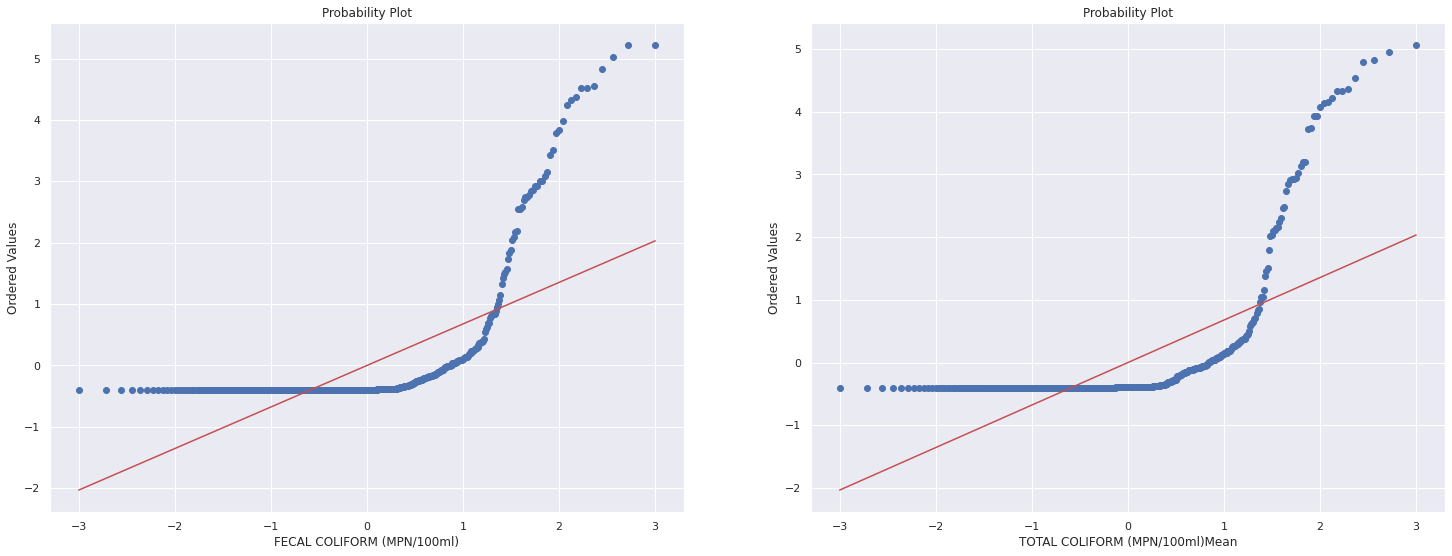

In [ ]:
fig1, (ax1, ax2)=plt.subplots(1,2)
stats.probplot(dfff['FECAL COLIFORM (MPN/100ml)'], plot=ax1)
stats.probplot(dfff['TOTAL COLIFORM (MPN/100ml)Mean'], plot=ax2)
ax1.set_xlabel('FECAL COLIFORM (MPN/100ml)')
ax2.set_xlabel('TOTAL COLIFORM (MPN/100ml)Mean')

In [ ]:
hypmean=hypdf["B.O.D. (mg/l)"].mean()
hypmean

4.485830999066295

# HYPOTHESIS TESTING 

###  For this estimate we will be using mean value of B.O.D of population  which is 4.5 mg/l. And hypothesis testing is being done for the 'B.O.D.' column.

### mean of the B.O.D is the reference
### H0: mean of the B.O.D is equal to 4.5 mg/l
### H1: mean of the B.O.D is not equal to 4.5 mg/l
 
## This will be a two Tailed Test
 

### Generating Sample

In [ ]:
hypdf['B.O.D. (mg/l)']=pd.to_numeric(hypdf['B.O.D. (mg/l)'],errors='coerce')
sampData = hypdf.sample(frac =.25).reset_index()
sampData

,index,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,469,3374.0,WAH BLEI,MEGHALAYA,18.8,7.7,7.2,55.0,1.6,3.00,15.000000,63.000000,2013-01-01
1,511,1149.0,KOLAK AT PATALIA BDG,GUJARAT,29.0,2.4,7.6,1500.0,6.2,1.31,3.000000,13.000000,2012-01-01
2,789,3373.0,"WAH BLEI AT RIANGDO, WEST KHASI HILLS",MEGHALAYA,20.0,7.7,7.1,46.0,1.6,3.93,8.000000,22.000000,2012-01-01
3,706,2947.0,"JAWAI AT JAWAI DAM, SIROHI",RAJASTHAN,24.0,6.0,8.3,468.0,1.4,0.43,5.000000,16.000000,2012-01-01
4,394,1448.0,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,27.0,6.0,7.3,432.0,1.2,3.00,3.000000,78.000000,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,259,2072.0,RIVER BHOGAVO D/S OF SURENDRANAGAR,GUJARAT,29.0,8.2,8.4,606.0,2.9,0.00,2549.193548,3796.939394,2013-01-01
126,815,1149.0,KOLAK AT PATALIA BDG.,GUJARAT,26.7,3.7,8.2,600.0,4.3,1.66,6.000000,20.000000,2011-01-01
127,230,3358.0,"UMNGOT RIVER AT DAWKI, EAST KHASI HILLS",MEGHALAYA,22.1,7.7,7.2,62.0,1.6,3.00,27.000000,59.000000,2014-01-01
128,572,2712.0,"VAITARNA NR RD BDG, GANDHARE VILLAGE, WADA, TH...",MAHARASHTRA,28.0,6.6,7.8,228.0,3.5,0.57,30.000000,79.000000,2012-01-01


This is two tailed test so alpha is 0.05.

In [ ]:
meansampData=sampData['B.O.D. (mg/l)'].mean()
N=130 
#from the above table
stand_deviation_pop=np.std(hypdf['B.O.D. (mg/l)'])
stand_deviation_pop

7.265205141292951

In [ ]:
import math
z_score=(meansampData-hypmean)/(stand_deviation_pop/math.sqrt(N))
z_score

-1.1337279763618557

From z-Table we can find the p value and and since this p value is to left area and its a two tailed test we multiply p by 2.
So, from the z table we get 0.1292.

So the p value for the two tailed test and for this specific sample is 0.26.

Now since p>alpha(0.05)
Hence, 
##  We FAIL to Reject NULL Hypothesis.


### **Correlation and Linear Regression :-**

**Heatmap depicting correlation between different parameters :-**

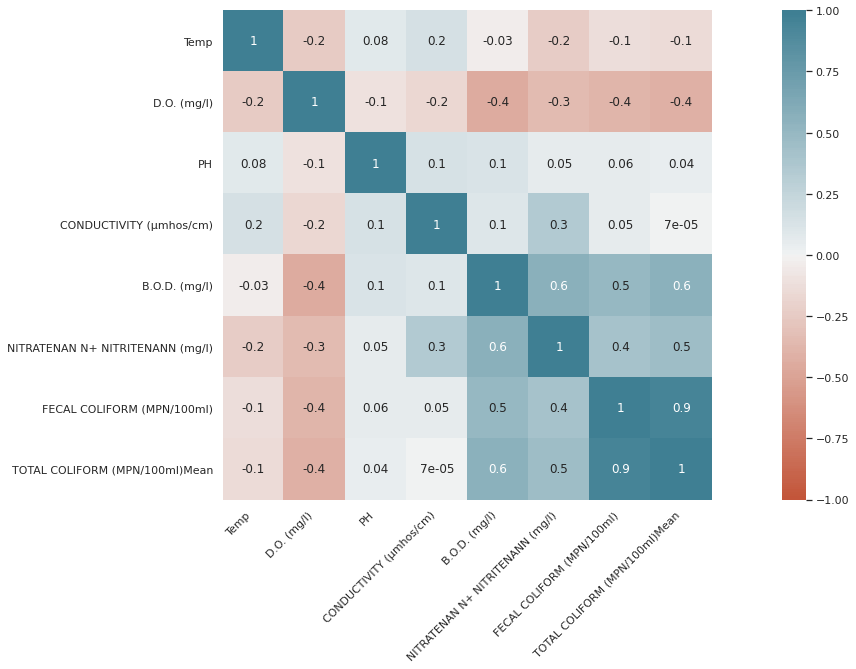

In [ ]:
corr = dfff.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, 
    fmt='.1g',
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Linear Regression to visualize the correlation between BOD vs Total Coliform :-** 

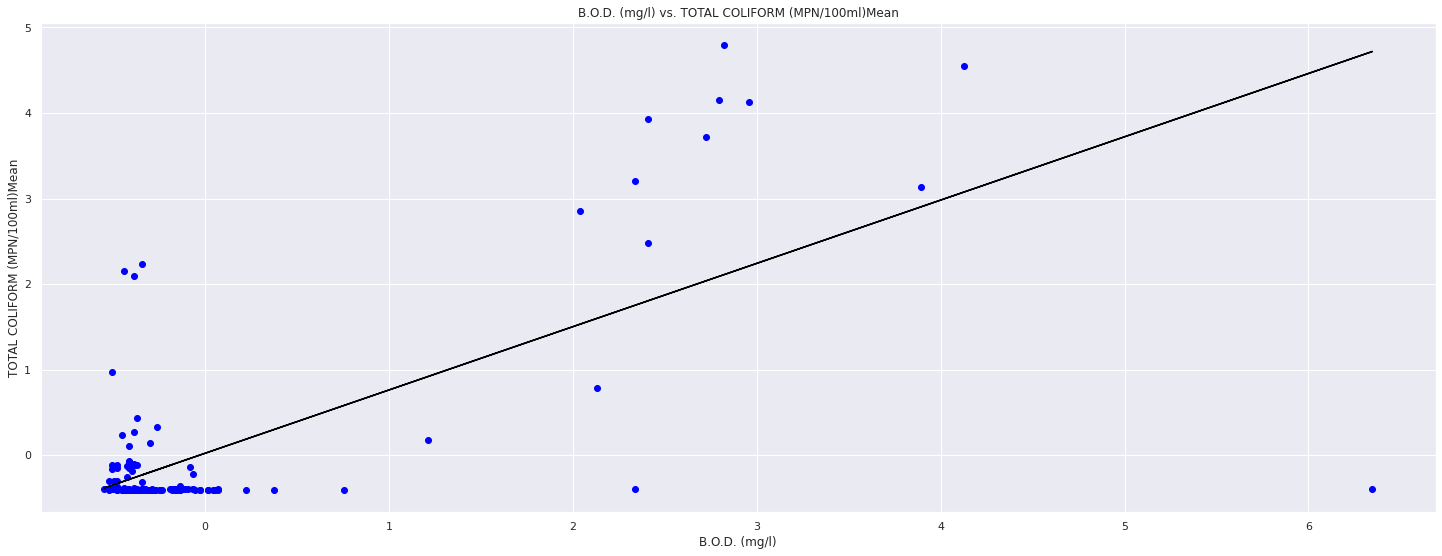

Slope = 0.7397406234831194


In [ ]:
LrData = dfff.sample(frac =.25).reset_index()
X = LrData["B.O.D. (mg/l)"]
Y = LrData["TOTAL COLIFORM (MPN/100ml)Mean"]
# print(X)
# print(Y)
len_x = len(X)

X_mean = X.mean()
Y_mean = Y.mean()
# print(X_mean)
# print(Y_mean)
slope_num = 0
slope_den = 0

for i in range(0,len_x):
    slope_num = slope_num + (X[i]-X_mean)*(Y[i]-Y_mean)
    slope_den = slope_den + (X[i]-X_mean)**2
# print(slope_num)
# print(slope_den)
slope=slope_num/slope_den
#print(slope)
C_term = Y_mean - X_mean*slope

Y_new = list()
for i in range(0,len_x):
    Y_new.append(X[i]*slope + C_term)
# print(Y_new)
plt.scatter(X,Y,color="blue")
plt.plot(X,Y_new,color="black")
plt.xlabel("B.O.D. (mg/l)")
plt.ylabel("TOTAL COLIFORM (MPN/100ml)Mean")
plt.title("B.O.D. (mg/l) vs. TOTAL COLIFORM (MPN/100ml)Mean")
plt.show()
print("Slope =",slope)

**So, we observe that B.O.D. (mg/l) and TOTAL COLIFORM (MPN/100ml)Mean are positively correlated with correlation coefficient r = 0.6**

**Linear regression to visulaize the correlation between fecal coliform and Total coliform**

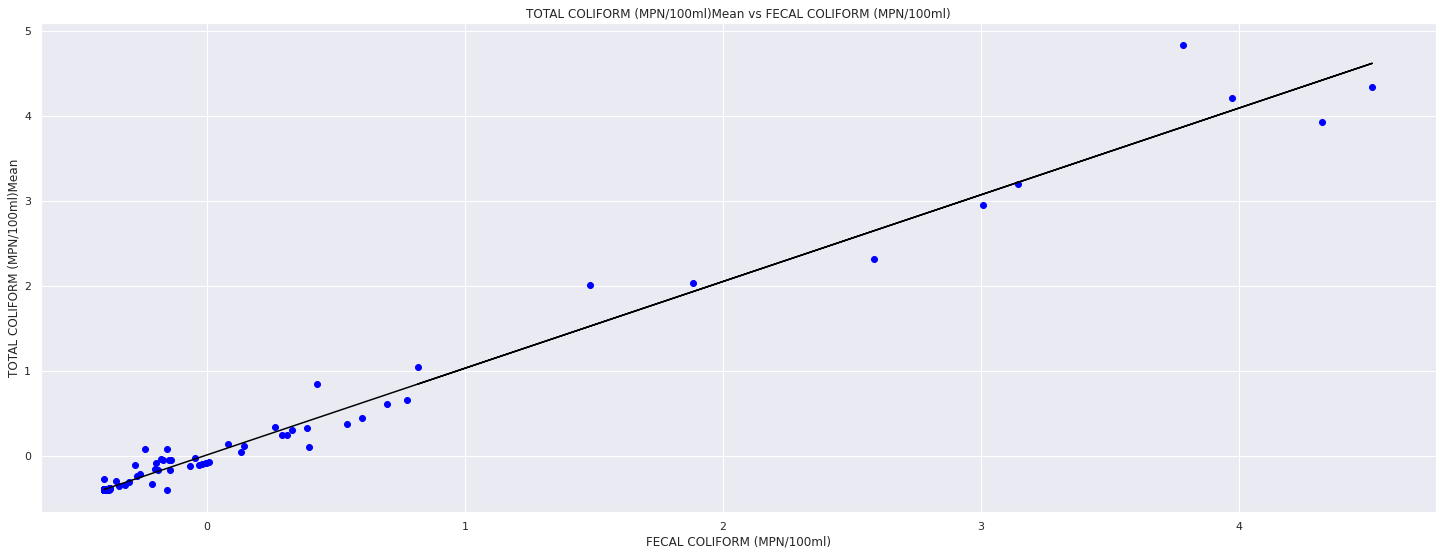

Slope = 1.0208553561479257


In [ ]:
LrData = dfff.sample(frac =.25).reset_index()
X = LrData["FECAL COLIFORM (MPN/100ml)"]
Y = LrData["TOTAL COLIFORM (MPN/100ml)Mean"]
# print(X)
# print(Y)
len_x = len(X)

X_mean = X.mean()
Y_mean = Y.mean()
# print(X_mean)
# print(Y_mean)
slope_num = 0
slope_den = 0

for i in range(0,len_x):
    slope_num = slope_num + (X[i]-X_mean)*(Y[i]-Y_mean)
    slope_den = slope_den + (X[i]-X_mean)**2
# print(slope_num)
# print(slope_den)
slope=slope_num/slope_den
#print(slope)
C_term = Y_mean - X_mean*slope

Y_new = list()
for i in range(0,len_x):
    Y_new.append(X[i]*slope + C_term)
# print(Y_new)
plt.scatter(X,Y,color="blue")
plt.plot(X,Y_new,color="black")
plt.xlabel("FECAL COLIFORM (MPN/100ml)")
plt.ylabel("TOTAL COLIFORM (MPN/100ml)Mean")
plt.title("TOTAL COLIFORM (MPN/100ml)Mean vs FECAL COLIFORM (MPN/100ml)")
plt.show()
print("Slope =",slope)

**So, we observe that B.O.D. (mg/l) and TOTAL COLIFORM (MPN/100ml)Mean are positively correlated with correlation coefficient r = 0.9**

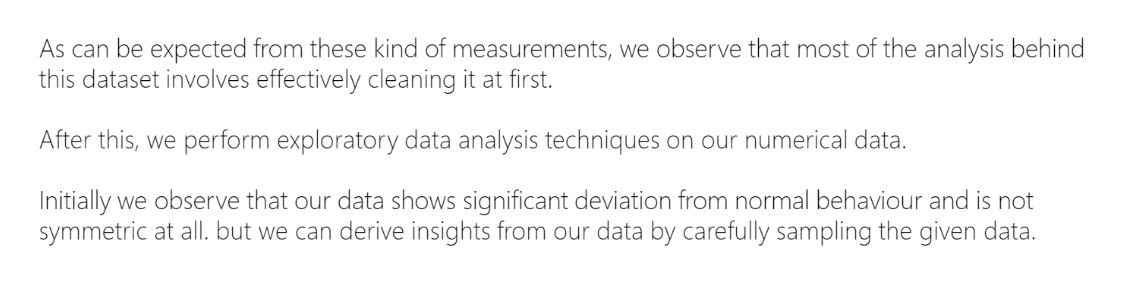

From our data analysis we find that : 

1.PUNJAB has the highest Total coliform level and second highest B.O.D levels thereby showing that it has the most polluted water in India.Rajasthan and Himachal pradesh having the least polluted water bodies.

2.Daman & Diu has the highest B.O.D (mg/l) level so we can say that Daman & Diu water bodies has very less  oxygen saturation in water due to the presence of algae pathogens, toxic substances , proving  harmful for the aquatic life. 

3.TAMIL NADU has most water bodies with pH level 6.5 followed by GOA which has most water bodies with pH level 6.75 means water is acidic and is unfit for use and harmful for the environment as well. 

4.we fail to reject the NULL Hypothesis which states B.O.D mean is 4.5 mg/l

5.B.O.D and Total coliform & Fecal coliform and Total coliform levels  are positively correlated qualifiers.

